In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [13]:
NUM_CLASSES = 5

# Dataset reading

In [14]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [15]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [18]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_2 (Dropout)          (None, 42)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                860       
_________________________________________________________________
dropout_3 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 55        
Total params: 1,125
Trainable params: 1,125
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [20]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [21]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
31/31 [==============================] - 0s 5ms/step - loss: 1.5996 - accuracy: 0.2564 - val_loss: 1.5200 - val_accuracy: 0.3257

Epoch 00001: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 2/1000
31/31 [==============================] - 0s 1ms/step - loss: 1.5101 - accuracy: 0.3207 - val_loss: 1.4453 - val_accuracy: 0.3554

Epoch 00002: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 3/1000
31/31 [==============================] - 0s 1ms/step - loss: 1.4324 - accuracy: 0.3660 - val_loss: 1.3141 - val_accuracy: 0.4837

Epoch 00003: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 4/1000
31/31 [==============================] - 0s 1ms/step - loss: 1.3444 - accuracy: 0.4115 - val_loss: 1.1835 - val_accuracy: 0.5801

Epoch 00004: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 5/1000
31/31 [==============================] - 0s 1ms/step - loss: 1.2732 - accuracy: 0.4510 - val_lo


Epoch 00037: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 38/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.6743 - accuracy: 0.7294 - val_loss: 0.3149 - val_accuracy: 0.9491

Epoch 00038: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 39/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.6634 - accuracy: 0.7398 - val_loss: 0.3171 - val_accuracy: 0.9491

Epoch 00039: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 40/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.6411 - accuracy: 0.7535 - val_loss: 0.3080 - val_accuracy: 0.9476

Epoch 00040: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 41/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.6555 - accuracy: 0.7391 - val_loss: 0.3084 - val_accuracy: 0.9491

Epoch 00041: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 42/1000
31/31 [==

31/31 [==============================] - 0s 1ms/step - loss: 0.5742 - accuracy: 0.7836 - val_loss: 0.2522 - val_accuracy: 0.9514

Epoch 00074: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 75/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.5632 - accuracy: 0.7839 - val_loss: 0.2455 - val_accuracy: 0.9560

Epoch 00075: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 76/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.5643 - accuracy: 0.7803 - val_loss: 0.2441 - val_accuracy: 0.9438

Epoch 00076: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 77/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.5791 - accuracy: 0.7793 - val_loss: 0.2425 - val_accuracy: 0.9552

Epoch 00077: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 78/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.5565 - accuracy: 0.7811 - val_loss: 0.241


Epoch 00110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 111/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.5181 - accuracy: 0.8056 - val_loss: 0.2206 - val_accuracy: 0.9544

Epoch 00111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 112/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.5377 - accuracy: 0.7922 - val_loss: 0.2216 - val_accuracy: 0.9575

Epoch 00112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 113/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.5261 - accuracy: 0.8023 - val_loss: 0.2201 - val_accuracy: 0.9514

Epoch 00113: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 114/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.5480 - accuracy: 0.7927 - val_loss: 0.2273 - val_accuracy: 0.9491

Epoch 00114: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 115/1000
31/3

31/31 [==============================] - 0s 1ms/step - loss: 0.5124 - accuracy: 0.8011 - val_loss: 0.2132 - val_accuracy: 0.9575

Epoch 00147: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 148/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.5161 - accuracy: 0.7947 - val_loss: 0.2130 - val_accuracy: 0.9605

Epoch 00148: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 149/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.5168 - accuracy: 0.8016 - val_loss: 0.2209 - val_accuracy: 0.9529

Epoch 00149: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 150/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.5240 - accuracy: 0.8011 - val_loss: 0.2183 - val_accuracy: 0.9582

Epoch 00150: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 151/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.4983 - accuracy: 0.8114 - val_loss: 0


Epoch 00183: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 184/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.4992 - accuracy: 0.8092 - val_loss: 0.2088 - val_accuracy: 0.9598

Epoch 00184: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 185/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.4954 - accuracy: 0.8180 - val_loss: 0.2107 - val_accuracy: 0.9537

Epoch 00185: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 186/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.5069 - accuracy: 0.8036 - val_loss: 0.2091 - val_accuracy: 0.9567

Epoch 00186: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 187/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.5062 - accuracy: 0.8094 - val_loss: 0.2088 - val_accuracy: 0.9582

Epoch 00187: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 188/1000
31/3

In [22]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

11/11 [==============================] - 0s 600us/step - loss: 0.2059 - accuracy: 0.9598


In [23]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [24]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[0.01484891 0.00568005 0.01244421 0.00332539 0.9637015 ]
4


# Confusion matrix

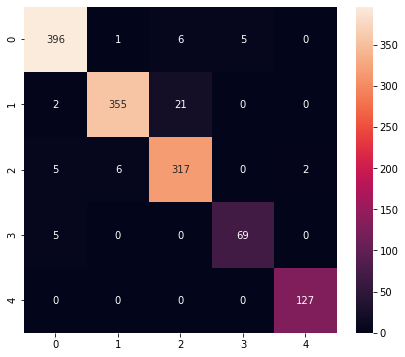

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       408
           1       0.98      0.94      0.96       378
           2       0.92      0.96      0.94       330
           3       0.93      0.93      0.93        74
           4       0.98      1.00      0.99       127

    accuracy                           0.96      1317
   macro avg       0.96      0.96      0.96      1317
weighted avg       0.96      0.96      0.96      1317



In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [28]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [29]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\offic\AppData\Local\Temp\tmpl_6ez15h\assets


6448

# Inference test

In [30]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [31]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [32]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [34]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [35]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.0148489  0.00568005 0.01244421 0.00332538 0.9637015 ]
4
